In [1]:
import models
from run_nompi import get_model
import pickle as pkl
import logging as log
import numpy as np
import matplotlib.pyplot as plt
import copy

--No graphics will be displayed.


In [19]:
def make_paramset(my_model,param_ind,nsamples):
    def_param_vals = my_model.DEFAULT_PARAMS
    param_set = np.array([def_param_vals]*nsamples)
    range_to_vary = my_model.PARAM_RANGES[param_ind]
    #vals_check = np.linspace(range_to_vary[0],range_to_vary[1],nsamples)
    vals_check=def_param_vals[param_ind]*np.exp(np.random.uniform(-1,1,size=nsamples)*np.log(10))
    param_set[:,param_ind] = vals_check
    return param_set

def make_paramset_regions(my_model,param_ind,nsamples,nregions):
    def_param_vals = my_model.DEFAULT_PARAMS
    param_sets = []
    range_to_vary = my_model.PARAM_RANGES[param_ind]
    for curr_region in range(nregions):
        # curr_lb = -1 + curr_region*(2/nregions)
        # curr_ub = -1 + (curr_region+1)*(2/nregions)
        curr_lb = -1 + curr_region*(2/nregions)*4
        curr_ub = -1 + (curr_region+1)*(2/nregions)*4
        print(curr_lb, curr_ub)
        curr_param_set = np.array([def_param_vals]*nsamples)
        curr_vals_check=def_param_vals[param_ind]*np.exp(np.random.uniform(curr_lb,curr_ub,size=nsamples)*np.log(10))
        curr_param_set[:,param_ind] = curr_vals_check
        param_sets.append(curr_param_set)
    return param_sets


In [20]:
# log.basicConfig(format='%(asctime)s %(message)s', level=log.DEBUG)
mtype = 'L5_TTPC1'
etype = 'cADpyr'
cell_id = '487664663'
param_ind = 3
# log = logging.getLogger(__name__)
nreigions = 8

In [21]:
my_model = get_model('ALLEN_F9',log,m_type=mtype,e_type=etype,cell_i=0,cell_id=cell_id) ;
def_vals = my_model.DEFAULT_PARAMS
pnames = [my_model.PARAM_NAMES[i] for i in range(len(def_vals)) if def_vals[i]>0]

# param_set = make_paramset(my_model,param_ind,20) #4 = gK_Pbar_K_P_soma
param_set = make_paramset_regions(my_model,param_ind,20, nreigions) #4 = gK_Pbar_K_P_soma

-1.0 0.0
0.0 1.0
1.0 2.0
2.0 3.0
3.0 4.0
4.0 5.0
5.0 6.0
6.0 7.0


In [85]:
# pnames

In [86]:
param_set[10] == param_set[11]

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [87]:
# dir(my_model)
stimfn = './stims/chaotic_2.csv'
stim =  np.genfromtxt(stimfn, dtype=np.float32) 

In [88]:
target_res = my_model.simulate(stim,0.025)

soma[0]
Running simulation for 200.0 ms with dt = 0.025
im:  0.00123839 gbar_Ih:  0.000633877 gbar_NaTs:  0.500453 gbar_Nap:  1.75857e-05 gbar_K_P:  0.000679687 gbar_K_T:  1.55986e-05 gbar_SK:  0.000530462 gbar_Ca_HVA:  0.000148359 gbar_Ca_LVA:  0.00960019 gamma_CaDynamics:  0.000679687 decay_CaDynamics:  365.102 g_pas:  1.4063e-05


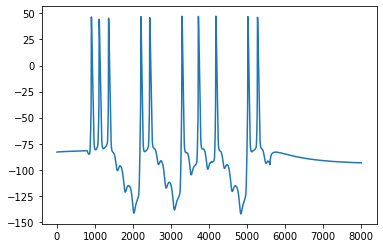

In [89]:
plt.plot(target_res['v'])

In [90]:
for orig, sampled in zip(def_vals,param_set[11] ):
    if orig != sampled:
        print(f"orig: {orig} , sampled: {sampled}")

orig: 1.758571027409006e-05 , sampled: 2.2316799203072863e-05


In [118]:
pset_copy = np.array(copy.deepcopy(param_set[11]))
pset_copy[param_ind] = 9.2316799203072863e-03
my_model = get_model('ALLEN_F9',log,mtype,etype,1, cell_id=cell_id, *pset_copy)
my_model.DEFAULT_PARAMS = False
sampled_res = my_model.simulate(stim,0.025)

gNapbar_Nap_soma is 0.009231679920307287  and orig is 1.758571027409006e-05
gNapbar_Nap_soma is 0.009231679920307287  and orig is 1.758571027409006e-05
soma[0]
Running simulation for 200.0 ms with dt = 0.025
im:  0.00123839 gbar_Ih:  0.000633877 gbar_NaTs:  0.500453 gbar_Nap:  0.00923168 gbar_K_P:  0.000679687 gbar_K_T:  1.55986e-05 gbar_SK:  0.000530462 gbar_Ca_HVA:  0.000148359 gbar_Ca_LVA:  0.00960019 gamma_CaDynamics:  0.000679687 decay_CaDynamics:  365.102 g_pas:  1.4063e-05


Text(0.5, 1.0, 'gNapbar_Nap_soma = 0.009231679920307287')

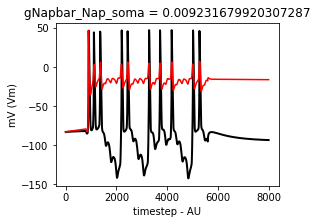

In [119]:
fig = plt.figure(figsize=(4,3))
plt.plot(target_res['v'], color='black', linewidth=2)
plt.plot(sampled_res['v'], color='red')
plt.xlabel('timestep - AU')
plt.ylabel('mV (Vm)')
plt.title(f'{pnames[param_ind]} = {pset_copy[param_ind]}')